<a href="https://colab.research.google.com/github/mftnakrsu/reinforcement-learning/blob/main/q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [6]:
env = gym.make('Taxi-v3')

#Q Table

In [19]:
action =env.action_space.n

In [20]:
q_table=np.zeros([env.observation_space.n,action])

#Hyperparameter

In [21]:
alpha =   0.1
gamma =   0.9
epsilon = 0.1

#Visualization

In [22]:
reward_list =  [] 
dropout_list = []

# Episode

In [ ]:
episode_number=10000
for i in range(1,episode_number):
  #initilaze environment
  state = env.reset()
  
  reward_count = 0
  dropouts = 0 

  while True:
    # exploid vs explore (action) %10 explore keşfet randomly, %90 daha önceden gittiği yerlere q table
    if random.uniform(0,1)<epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(q_table[state])

    # action process and take reward/observation
    next_state, reward,done,_ = env.step(action)
    # Q learning function
    old_value=q_table[state,action]
    next_max =np.max(q_table[next_state])
    next_value = (1-alpha)*old_value+alpha*(reward+gamma*next_max)

    # Q learning update
    q_table[state,action] = next_value
    # update state
    state = next_state
    # find wrong dropouts
    if reward == -10: # taxi env dropout
      dropouts+=1

    if done:
      break
    

    reward_count+=reward
  if i%10 ==0:

    dropout_list.append(dropouts)
    reward_list.append(reward_count)

    print("Episode: {}, reward {}, wrong dropout {}".format(i,reward_count,dropouts))



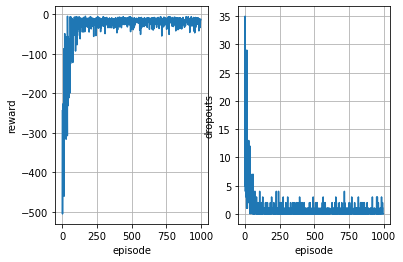

In [27]:
fig, axs = plt.subplots(1,2) 

axs[0].plot(reward_list)
axs[0].set_xlabel("episode")
axs[0].set_ylabel("reward")

axs[1].plot(dropout_list)
axs[1].set_xlabel("episode")
axs[1].set_ylabel("dropouts")

axs[0].grid(True)
axs[1].grid(True)

plt.show()

In [28]:
#Q table comment

In [31]:
import pandas as pd
df = pd.DataFrame(q_table)

In [32]:
df[16:20]

,0,1,2,3,4,5
16,14.271132,16.935082,13.866624,16.771609,7.793456,20.000000
17,2.914016,1.123755,-1.108062,0.714487,-7.051519,-0.673493
18,9.683000,5.972033,1.496903,3.005820,-1.403132,4.183858
19,4.348907,1.467972,-0.428654,1.556833,-5.910736,0.676931


In [39]:
state1 = env.encode(4,4,4,3)
env.s = state1 #dropoff
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [40]:
state2 = env.encode(0,0,3,4)
env.s = state #dropoff
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
